# Preços de casas na Califórnia - Modelos de Regressão

A base "California Housing Prices", apresentada no livro Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, contém informações sobre o mercado imobiliário na Califórnia, com o objetivo principal de prever o valor mediano das casas em diferentes regiões.

---
# Importando algumas bibliotecas "padrões" para ciência de dados e análise de dados no python

In [235]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
# EDA
**Descrição das Colunas**
1. **longitude** — Coordenada geográfica de longitude da localização.

2. **latitude** — Coordenada geográfica de latitude da localização.

3. **housing_median_age** — Idade mediana das construções residenciais na área.

4. **total_rooms** — Total de cômodos por área.

5. **total_bedrooms** — Total de quartos por área.

6. **population** — População total da área.

7. **households** — Número de domicílios na área.

8. **median_income** — Renda mediana da área, em dezenas de milhares de dólares.

9. **median_house_value** — Valor mediano dos imóveis na área (em dólares).
**⚠️ Observação importante:** essa variável possui um valor máximo truncado em $500.000,00. Isso significa que imóveis com valores superiores foram limitados a esse teto, o que pode introduzir um viés nos modelos de regressão e limitar sua capacidade de prever valores muito altos com precisão.

10 **ocean_proximity** — Proximidade com o oceano, uma variável categórica que indica se a área está:

* *NEAR BAY*: Próximo à baía

* *<1H OCEAN*: Menos de 1 hora do oceano

* *INLAND*: Interior, longe do oceano

* *NEAR OCEAN*: Próximo ao oceano

* *ISLAND*: Em uma ilha

In [236]:
house_db = pd.read_csv("housing.csv")
house_db

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Existem algumas células de "*total_bedrooms*" que estão vazias, portanto precisamos tratá-las.

E temos duas opções, e é isso que iremos ver nesse primeiro momento.

In [237]:
house_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [238]:
house_db.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Tratando as células vazias somente a partir da mediana

Nossa primeira opção é simplesmente substituir nossos dados faltantes pela mediana da coluna.

In [239]:
house_db_mediana = house_db.copy()
mediana = house_db_mediana['total_bedrooms'].median()
house_db_mediana['total_bedrooms'] = house_db_mediana['total_bedrooms'].fillna(mediana)

In [240]:
house_db_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Tratando as células vazias a partir de modelos de regressão

Outra opção que temos é preenchermos os valores faltantes usando modelos de machine learning.

Para isso precisamos separar nossa base do seguinte modo:

1. Base de treinamento (somente linhas preenchidas);
2. Base de teste (as linhas com as células que iremos preencher).

In [241]:
house_db_train = house_db.dropna().copy()

In [242]:
house_db_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [243]:
from sklearn.preprocessing import LabelEncoder

le_ocean = LabelEncoder()
house_db_train['ocean_proximity'] = le_ocean.fit_transform(house_db_train['ocean_proximity'])

Podemos calcular a correlação das variáveis para podermos ter noção das que mais afetam:

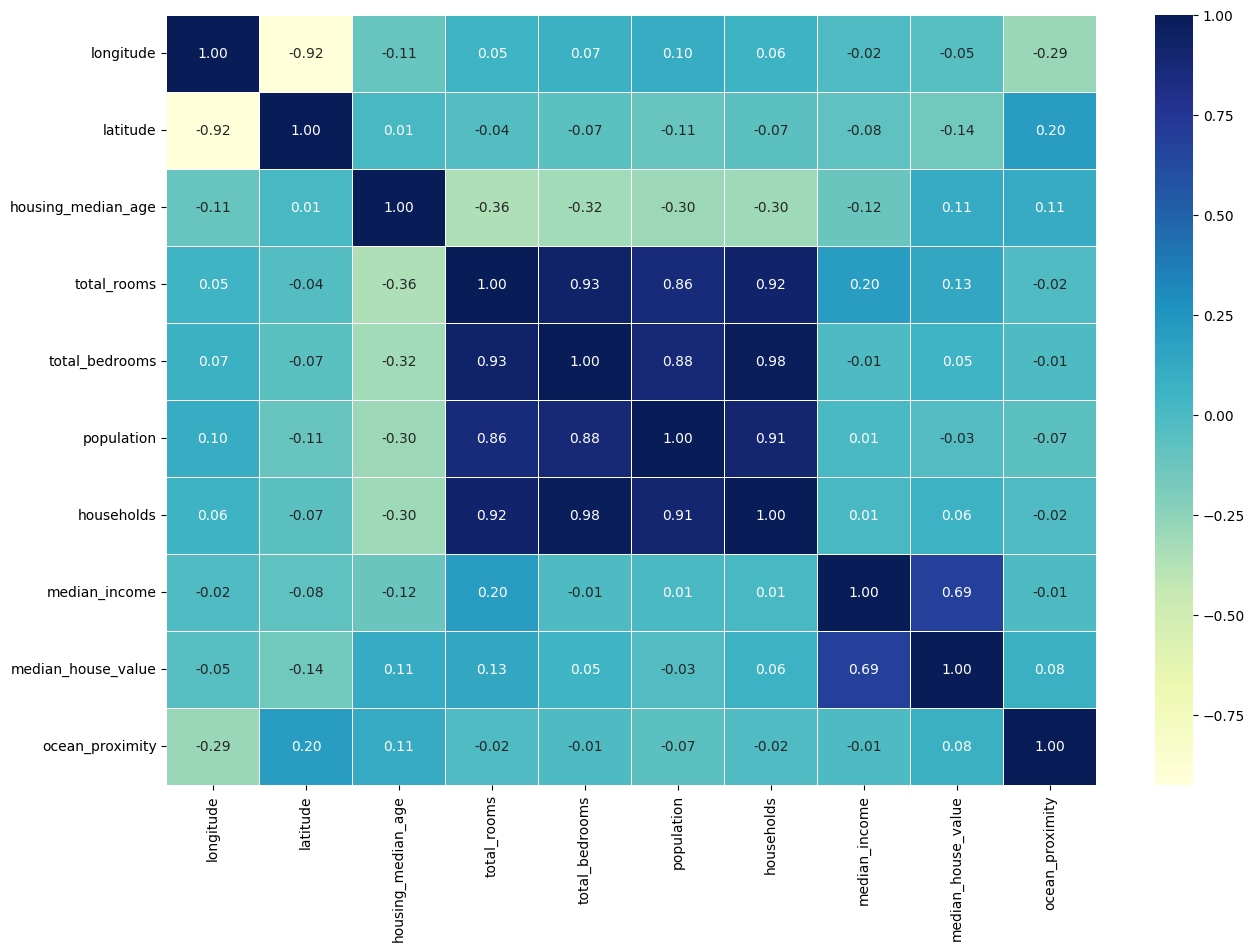

In [244]:
corr_matrix = house_db_train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

In [245]:
x_house = house_db_train.drop('total_bedrooms', axis=1)
y_house = house_db_train['total_bedrooms']

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_house = scaler.fit_transform(x_house)

In [247]:
from sklearn.model_selection import train_test_split
x_house_treinamento, x_house_teste, y_house_treinamento, y_house_teste = train_test_split(x_house, y_house, test_size = 0.25, random_state = 0)

In [248]:
x_house_treinamento.shape, x_house_teste.shape

((15324, 9), (5109, 9))

### Usando o modelo de Regressão multipla para descobrirmos o Total de Quartos (MSE = 5328.77)

In [249]:
from sklearn.linear_model import LinearRegression
regres_cali = LinearRegression()
regres_cali.fit(x_house_treinamento, y_house_treinamento)

LinearRegression()

In [250]:
regres_cali.intercept_

np.float64(537.6735427823471)

In [251]:
regres_cali.coef_

array([ 25.34113846,  18.02173587,  -5.35634789, 116.50314992,
       -38.52681626, 338.81464847, -38.44230272,  13.01898041,
         1.83138619])

In [252]:
regres_cali.score(x_house_treinamento, y_house_treinamento)

0.9733611308367746

In [253]:
regres_cali.score(x_house_teste, y_house_teste)

0.9701763704597293

In [254]:
previsoes = regres_cali.predict(x_house_teste)
previsoes

array([421.89376682, 732.99618124, 752.06112453, ..., 404.14630725,
       180.08808662, 312.74389796])

In [255]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_house_teste, previsoes)

37.70493261309885

In [256]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_house_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_house_teste, previsoes)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 5328.771309472683
RMSE: 72.9984336097199
R²: 0.9701763704597293


### Usando o modelo de regressão polinomial para descobrirmos o Total de Quartos (MSE = 1685.34)

In [257]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_house_treinamento_poly = poly.fit_transform(x_house_treinamento)
x_house_teste_poly = poly.transform(x_house_teste)

In [258]:
x_house_treinamento_poly.shape, x_house_teste_poly.shape

((15324, 220), (5109, 220))

In [259]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(x_house_treinamento_poly, y_house_treinamento)

LinearRegression()

In [260]:
regressor_casas_poly.score(x_house_treinamento_poly, y_house_treinamento)

0.9918352536295442

In [261]:
regressor_casas_poly.score(x_house_teste_poly, y_house_teste)

0.9905676528026557

In [262]:
previsoes = regressor_casas_poly.predict(x_house_teste_poly)
previsoes

array([416.43869339, 728.58961774, 772.50805332, ..., 418.53292685,
       144.9249561 , 309.28392857])

In [263]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_house_teste, previsoes)

25.220701269998273

In [264]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_house_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_house_teste, previsoes)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 1685.3354840102143
RMSE: 41.052837709593405
R²: 0.9905676528026557


Portanto, iremos optar por seguir com o modelo de regressão polinomial

In [265]:
x_train = np.concatenate((x_house_treinamento_poly, x_house_teste_poly), axis = 0)
y_train = np.concatenate((y_house_treinamento, y_house_teste), axis = 0)
x_train.shape, y_train.shape

((20433, 220), (20433,))

In [266]:
regressor_casas_poly.fit(x_train, y_train)

LinearRegression()

In [267]:
preencher = house_db[house_db['total_bedrooms'].isnull()].copy()

In [268]:
preencher.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 290 to 20484
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           207 non-null    float64
 1   latitude            207 non-null    float64
 2   housing_median_age  207 non-null    float64
 3   total_rooms         207 non-null    float64
 4   total_bedrooms      0 non-null      float64
 5   population          207 non-null    float64
 6   households          207 non-null    float64
 7   median_income       207 non-null    float64
 8   median_house_value  207 non-null    float64
 9   ocean_proximity     207 non-null    object 
dtypes: float64(9), object(1)
memory usage: 17.8+ KB


In [269]:
# A criação desse Dataframe é de extrema importância pois precisamos submeter a resposta com a coluna "ocean_proximity" como objeto, então vamos precisar criar outra tabela para isso
preenchido = preencher.copy()

In [270]:
from sklearn.preprocessing import LabelEncoder

le_ocean = LabelEncoder()
preencher['ocean_proximity'] = le_ocean.fit_transform(preencher['ocean_proximity'])

In [271]:
x_house = preencher.drop('total_bedrooms', axis=1)
y_house = preencher['total_bedrooms']

In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_house = scaler.fit_transform(x_house)

In [273]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_house_poly = poly.fit_transform(x_house)

In [274]:
previsoes = regressor_casas_poly.predict(x_house_poly)
previsoes

array([ 202.07373242,  233.62261513, 1325.18966734,  128.22172107,
        126.67444733,  584.05656928,  615.9982695 , 1097.51819286,
        577.83771826,  539.59719815,  675.05869213,  343.37987472,
       1457.37832343, 1028.52601399,  584.4511618 ,  210.57243606,
        268.96607423,  212.54579089,  193.73959021,  763.8809839 ,
        283.70742287,   85.27093806,  -26.23012555,  619.39399189,
        534.40695158,  951.72675339,  775.16833697,  604.69334801,
       1331.86884836,  546.04330037,  790.56254605, 1599.39676133,
       1377.92775807,  413.74200357,  707.62130317,  142.80011213,
        594.20558872,  271.61476705,  289.13175133,  784.72840345,
        420.5638139 ,  444.17732103,  267.40597782, 1266.3350324 ,
        706.26368815, 1610.6379456 ,  431.38876703,  536.61318031,
        165.9487646 ,  270.97880734,  509.907401  ,  274.65878144,
        264.82778569,  811.8361683 ,  210.5184036 ,  516.14440392,
        282.79706796,  420.04646605,  814.83892014,  452.73328

In [275]:
preenchido['total_bedrooms'] = previsoes
preenchido.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,202.073732,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,233.622615,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,1325.189667,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,128.221721,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,126.674447,387.0,161.0,3.9063,178400.0,NEAR BAY


In [276]:
house_db_sem_nan = house_db.dropna().copy()

In [277]:
house_db_regressao = pd.concat([house_db_sem_nan, preenchido])
house_db_regressao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20484
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [278]:
house_db_regressao.to_csv("houing_regr.csv", index=False)

## PRONTO! Temos toda a base de dados preenchida e com uma ALTÍSSIMA precisão, agora podemos explorar melhor o EDA dessa base.

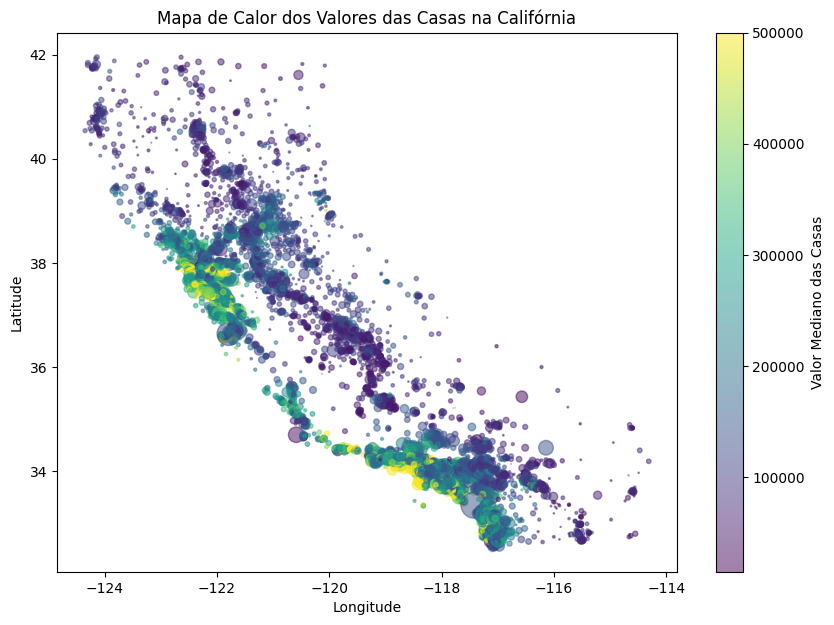

In [279]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    house_db_regressao['longitude'],
    house_db_regressao['latitude'],
    c=house_db_regressao['median_house_value'],
    cmap='viridis',
    alpha=0.5,
    s= house_db_regressao['population'] / 100
)
plt.colorbar(scatter, label='Valor Mediano das Casas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Calor dos Valores das Casas na Califórnia')
plt.show()

In [280]:
#Esse código cria um arquivo em HTML do mapa da califórnia
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[37, -119], zoom_start=6)

heat_data = [[row['latitude'], row['longitude'], row['median_house_value']] for index, row in house_db_regressao.iterrows()]

HeatMap(heat_data, radius=8, max_zoom=13).add_to(mapa)

mapa.save('mapa_california.html')

In [281]:
grafico = px.scatter_matrix(
    house_db_regressao,
    dimensions=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population'],
    color='median_house_value',
    title='Matriz de Dispersão - Casas na Califórnia',
    height=700
)

grafico.update_traces(diagonal_visible=False)  #esconde gráficos de dispersão na diagonal
grafico.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

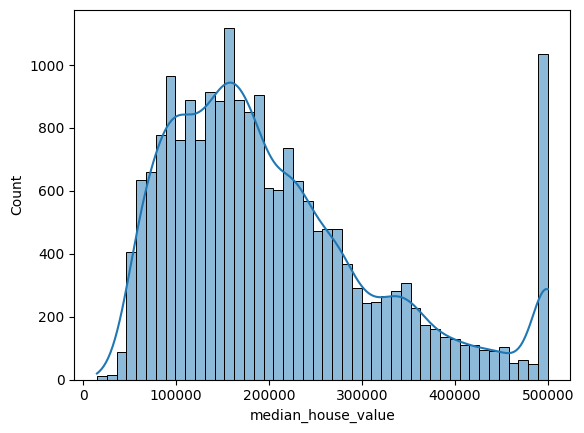

In [282]:
sns.histplot(house_db_regressao['median_house_value'], kde=True)

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

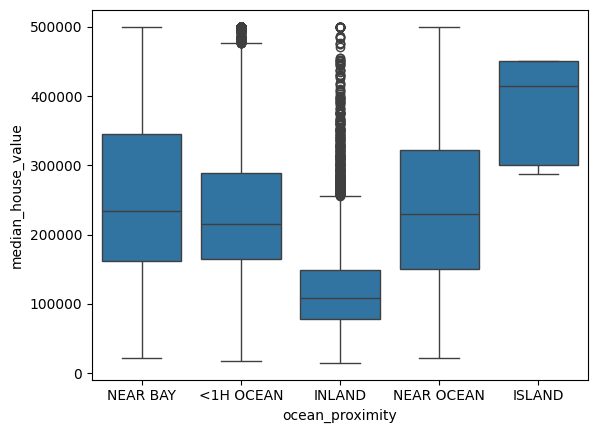

In [283]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=house_db_regressao)

**Interpretação do BOXPLOT**:
* NEAR BAY e NEAR OCEAN

Valores medianos mais altos, indicando que estar perto da baía ou do oceano eleva o preço das casas.

Também têm uma faixa de preços bem distribuída.

* <1H OCEAN

Tem uma mediana menor que as anteriores.

Alguns outliers indicam casas de valor elevado mesmo não estando tão perto do mar.

* INLAND

Menores preços medianos disparado.

Distribuição concentrada em valores mais baixos.

Muitos outliers para cima, mas o grosso das casas é barato.

* ISLAND

Curiosamente, tem um preço mediano bem alto, com pouca variabilidade.

Pode indicar poucas observações, pois o box é estreito e com poucos pontos.

Agora, podemos aplicar o LabelEncoder na coluna "ocean_proximity" da base house_db_regressao.

Mas por que não realizamos esse tratamento antes, junto com as tabelas que foram concatenadas?

Isso acontece porque, anteriormente, aplicamos o LabelEncoder separadamente em cada tabela. Isso gera um risco: o mesmo valor pode acabar sendo codificado com números diferentes em cada tabela. Por exemplo:

Na Tabela 1, "NEAR BAY" foi codificado como 0

Já na Tabela 2, "NEAR BAY" pode ter sido codificado como 2

Esse tipo de inconsistência pode comprometer a qualidade do modelo. Por isso, agora aplicamos o encoding de forma unificada, garantindo que cada categoria mantenha o mesmo valor codificado em toda a base.

In [284]:
from sklearn.preprocessing import LabelEncoder

le_ocean = LabelEncoder()
house_db_regressao['ocean_proximity'] = le_ocean.fit_transform(house_db_regressao['ocean_proximity'])

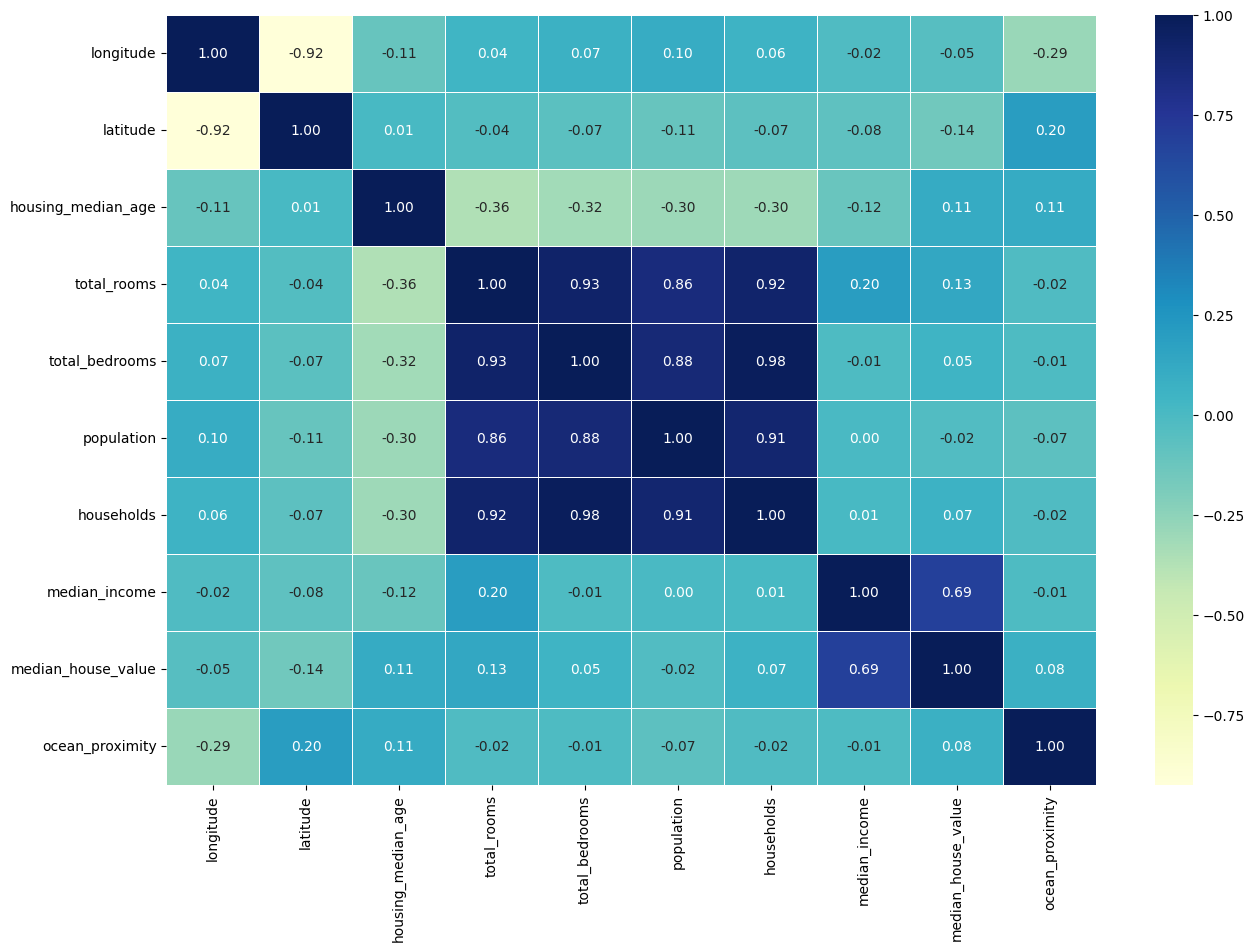

In [285]:
corr_matrix = house_db_regressao.select_dtypes(include=np.number).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

In [286]:
house_db_regressao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20484
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


---
# MÃOS-À-OBRA - Prevendo o Valor Mediano das Casas

Agora podemos treinar nossos modelos de regressão onde iremos comparar qual tratamento de dados se saiu melho, MEDIANA ou REGRESSÃO?

## MEDIANA

In [287]:
house_db_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [288]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
house_db_mediana['ocean_proximity'] = le.fit_transform(house_db_mediana['ocean_proximity'])

In [289]:
x_casa = house_db_mediana.drop('median_house_value', axis=1)
y_casa = house_db_mediana['median_house_value']

In [290]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_casa = scaler.fit_transform(x_casa)

In [291]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casa, y_casa, test_size = 0.25, random_state = 0)

In [292]:
regressor = LinearRegression()
regressor.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [293]:
regressor.score(x_casas_treinamento, y_casas_treinamento)

0.6386249856141073

In [294]:
regressor.score(x_casas_teste, y_casas_teste)

0.6258012289971691

In [295]:
previsoes = regressor.predict(x_casas_teste)
previsoes

array([211185.67378574, 280730.77794741, 191093.5885458 , ...,
       220969.18430246, 295089.64205163, 282563.49418071])

In [296]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

51229.946834240305

In [297]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_casas_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_casas_teste, previsoes)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 4946348902.289097
RMSE: 70330.28438936599
R²: 0.6258012289971691


## REGRESSÃO

In [298]:
house_db_regressao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20484
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [299]:
x_casa = house_db_regressao.drop('median_house_value', axis=1)
y_casa = house_db_regressao['median_house_value']

In [300]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_casa = scaler.fit_transform(x_casa)

In [301]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casa, y_casa, test_size = 0.25, random_state = 0)

In [302]:
regressor = LinearRegression()
regressor.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [303]:
regressor.score(x_casas_treinamento, y_casas_treinamento)

0.6316627242099626

In [304]:
regressor.score(x_casas_teste, y_casas_teste)

0.6525813413431829

In [305]:
previsoes = regressor.predict(x_casas_teste)
previsoes

array([240838.63309814, 154392.77537295, 208090.7505029 , ...,
       334287.9799734 , 252850.06312034, 301866.8809953 ])

In [306]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

50652.993705131266

In [307]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_casas_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_casas_teste, previsoes)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 4734837560.139703
RMSE: 68810.15593747556
R²: 0.6525813413431829


Pudemos notar claramente que nosso arquivo que foi tratado usando Regressão nos trouxe um melhor desempenho, portanto iremos apenas utilizá-lo daqui para frente.

---
## Validando modelos de Regressão

A partir de agora iremos aplicar na prática 9 (nove) modelos diferentes de regressão para prever o valor mediano das casas na região, esses modelos a serem avaliados são:

1. Regressão Múltipla;

2. Regressão Polinomial;

3. Regressão de Ridge;

4. Regressão Lasso;

5. ElasticNet;

6. Regressão de Árvore de Decisão;

7. Regressão Random Forest;

8. Regressão SVM (SVR);

9. Regressão de Redes Neurais.

In [308]:
house_db_regressao.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [309]:
x_casa = house_db_regressao.drop('median_house_value', axis=1)
y_casa = house_db_regressao['median_house_value']

In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import time #Vamos calcular o tempo necessário para os modelos serem treinados, assim poderemos selecionar o mais eficiente

MÚLTIPLA x POLINOMIAL

Logo de cara iremos testar qual é o melhor modelo, regressão múltipla ou polinomial?

Ao termos essa resposta, podemos seguir testando somente a regressão que se sair melhor nos modelos de "*sklearn.linear_model*".

In [311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_casa, y_casa)

print("Melhor grau polinomial:", grid_search.best_params_)
print("Melhor MSE:", grid_search.best_score_)


Melhor grau polinomial: {'poly__degree': 2}
Melhor MSE: -4914907908.96149


O melhor resultado obtido foi para regressão polinomial de grau 2, portanto iremos seguir com esse tratamento para os modelos de "*sklearn.linear_model*".

In [312]:
scaler = StandardScaler()
x_casa = scaler.fit_transform(x_casa)

In [313]:
x_casa

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [ 0.34425268, -0.68442389, -1.08376738, ...,  0.44324153,
         0.6488287 , -0.82065324],
       [ 0.40913967, -0.6282415 , -0.92485123, ...,  0.82250449,
         1.44050111, -0.82065324],
       [ 0.4241136 , -0.63292337, -0.92485123, ..., -0.01187402,
         0.98271022, -0.82065324]])

In [314]:
poly = PolynomialFeatures(degree = 2)
x_casa_poly = poly.fit_transform(x_casa)

In [315]:
x_casa_poly.shape

(20640, 55)

In [316]:
from sklearn.model_selection import train_test_split
x_casa_treinamento, x_casa_teste, y_casa_treinamento, y_casa_teste = train_test_split(x_casa, y_casa, test_size = 0.25, random_state = 0)

In [317]:
from sklearn.model_selection import train_test_split
x_poly_treinamento, x_poly_teste, y_poly_treinamento, y_poly_teste = train_test_split(x_casa_poly, y_casa, test_size = 0.25, random_state = 0)

In [318]:
x_casa_treinamento.shape, y_casa_treinamento.shape

((15480, 9), (15480,))

In [319]:
x_poly_treinamento.shape, y_poly_treinamento.shape

((15480, 55), (15480,))

Polinomial

In [320]:
regressor_casas_poly = LinearRegression()
start_time = time.time()
regressor_casas_poly.fit(x_poly_treinamento, y_poly_treinamento)
end_time = time.time()

#Vamos calcular o tempo de treinamento
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 0.05 segundos


In [321]:
score_treino = regressor_casas_poly.score(x_poly_treinamento, y_poly_treinamento)
score_teste = regressor_casas_poly.score(x_poly_teste, y_poly_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.7000631409179662
R² no conjunto de teste: 0.7102612463046104


In [322]:
previsoes = regressor_casas_poly.predict(x_poly_teste)

In [323]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_poly_teste, previsoes)
mse = mean_squared_error(y_poly_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_poly_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 44614.2324560022
MSE: 3948739940.8220534
RMSE: 62839.00015772095
R²: 0.7102612463046104


Ridge

In [324]:
ridge_poly = Ridge()
start_time = time.time()
ridge_poly.fit(x_poly_treinamento, y_poly_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 0.03 segundos


In [325]:
score_treino = ridge_poly.score(x_poly_treinamento, y_poly_treinamento)
score_teste = ridge_poly.score(x_poly_teste, y_poly_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.7000566975917499
R² no conjunto de teste: 0.7103550286682584


In [326]:
previsoes = ridge_poly.predict(x_poly_teste)

In [327]:
mae = mean_absolute_error(y_poly_teste, previsoes)
mse = mean_squared_error(y_poly_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_poly_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 44612.03390376276
MSE: 3947461816.4415264
RMSE: 62828.8295008074
R²: 0.7103550286682584


Lasso

In [328]:
lasso_poly = Lasso()
start_time = time.time()
lasso_poly.fit(x_poly_treinamento, y_poly_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 1.07 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e+13, tolerance: 2.045e+10



In [329]:
score_treino = lasso_poly.score(x_poly_treinamento, y_poly_treinamento)
score_teste = lasso_poly.score(x_poly_teste, y_poly_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.6996540747946414
R² no conjunto de teste: 0.7096771184476034


In [330]:
previsoes = lasso_poly.predict(x_poly_teste)

In [331]:
mae = mean_absolute_error(y_poly_teste, previsoes)
mse = mean_squared_error(y_poly_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_poly_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 44608.18934987106
MSE: 3956700798.5605907
RMSE: 62902.31155180699
R²: 0.7096771184476034


ElasticNet

In [332]:
EN = ElasticNet()
start_time = time.time()
EN.fit(x_poly_treinamento, y_poly_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 1.37 segundos


In [333]:
score_treino = EN.score(x_poly_treinamento, y_poly_treinamento)
score_teste = EN.score(x_poly_teste, y_poly_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.5479280298948153
R² no conjunto de teste: 0.5575462979636125


In [334]:
previsoes = EN.predict(x_poly_teste)

In [335]:
mae = mean_absolute_error(y_poly_teste, previsoes)
mse = mean_squared_error(y_poly_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_poly_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 58485.36284938433
MSE: 6030034239.163168
RMSE: 77653.29509533494
R²: 0.5575462979636125


Árvore de Decisão

In [336]:
DT = DecisionTreeRegressor(max_depth=9, random_state=42)
start_time = time.time()
DT.fit(x_casa_treinamento, y_casa_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 0.16 segundos


In [337]:
score_treino = DT.score(x_casa_treinamento, y_casa_treinamento)
score_teste = DT.score(x_casa_teste, y_casa_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.807431595349239
R² no conjunto de teste: 0.7272305277828258


In [338]:
previsoes = DT.predict(x_casa_teste)

In [339]:
mae = mean_absolute_error(y_casa_teste, previsoes)
mse = mean_squared_error(y_casa_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_casa_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 40151.034338004276
MSE: 3717472018.6492133
RMSE: 60971.07526236693
R²: 0.7272305277828258


Random Forest

In [340]:
RF = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=3)
start_time = time.time()
RF.fit(x_casa_treinamento, y_casa_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 25.73 segundos


In [341]:
score_treino = RF.score(x_casa_treinamento, y_casa_treinamento)
score_teste = RF.score(x_casa_teste, y_casa_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.9385412554810373
R² no conjunto de teste: 0.8217173402381269


In [342]:
previsoes = RF.predict(x_casa_teste)

In [343]:
mae = mean_absolute_error(y_casa_teste, previsoes)
mse = mean_squared_error(y_casa_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_casa_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 31852.698754620887
MSE: 2429746971.638538
RMSE: 49292.463639369234
R²: 0.8217173402381269


SVM (SVR)

In [344]:
SVM = SVR()
start_time = time.time()
SVM.fit(x_casa_treinamento, y_casa_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 15.83 segundos


In [345]:
score_treino = SVM.score(x_casa_treinamento, y_casa_treinamento)
score_teste = SVM.score(x_casa_teste, y_casa_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: -0.04960057488924963
R² no conjunto de teste: -0.050670443662226505


In [346]:
previsoes = SVM.predict(x_casa_teste)

In [347]:
mae = mean_absolute_error(y_casa_teste, previsoes)
mse = mean_squared_error(y_casa_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_casa_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 89264.55344058135
MSE: 14319190279.571766
RMSE: 119662.81911927265
R²: -0.050670443662226505


Redes Neurais

In [348]:
RN = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
start_time = time.time()
RN.fit(x_casa_treinamento, y_casa_treinamento)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Tempo de treinamento: 204.88 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [349]:
score_treino = RN.score(x_casa_treinamento, y_casa_treinamento)
score_teste = RN.score(x_casa_teste, y_casa_teste)

print("R² no conjunto de treinamento:", score_treino)
print("R² no conjunto de teste:", score_teste)

R² no conjunto de treinamento: 0.7188641502917164
R² no conjunto de teste: 0.7329550927080721


In [350]:
previsoes = RN.predict(x_casa_teste)

In [351]:
mae = mean_absolute_error(y_casa_teste, previsoes)
mse = mean_squared_error(y_casa_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_casa_teste, previsoes)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 42162.59622030487
MSE: 3639454087.406524
RMSE: 60327.88813978593
R²: 0.7329550927080721


---
### Resumo dos modelos

# Regressão Polinomial:
* Tempo de treinamento: 0,28 segundos
* MAE: 44.614,23
* MSE: 3.948.739.940,82
* RMSE: 62.839,00
* R²: 0,7103

# Regressão de Ridge:
* Tempo de treinamento: 0,02 segundos
* MAE: 44.612,03
* MSE: 3.947.461.816,44
* RMSE: 62.828,83
* R²: 0,7104

# Regressão Lasso:
* Tempo de treinamento: 2,99 segundos **NÃO CONVERGIU**
* MAE: 44.608,19
* MSE: 3.956.700.798,56
* RMSE: 62.902,31
* R²: 0,7097

# ElasticNet:
* Tempo de treinamento: 1,08 segundos
* MAE: 58485,36
* MSE: 6.030.034.239,16
* RMSE: 77.653,30
* R²: 0,5575

# Regressão de Árvore de Decisão:
* Tempo de treinamento: 0,13 segundos
* MAE: 40.151,034338004276
* MSE: 3.717.472.018,6492133
* RMSE: 60.971,07526236693
* R²: 0,7272

# 👑Regressão Random Forest👑:
* Tempo de treinamento: 29.48 segundos
* MAE: 31.852,70
* MSE: 2.429.746.971,64
* RMSE: 49.292,46
* R²: 0,8217

# Regressão SVM (SVR) - *Para esse modelo em específico seria necessário um TUNNING:*
* Tempo de treinamento: 14,60 segundos
* MAE: 89.264,55
* MSE: 14.319.190.279,57
* RMSE: 119.662,82
* R²: -0,0507

# Regressão de Redes Neurais:
* Tempo de treinamento: 233,82 segundos **NÃO CONVERGIU**
* MAE: 42.162,60
* MSE: 3.639.454.087,41
* RMSE: 60.327,89
* R²: 0,7330
---

# Previsão x Valores reais





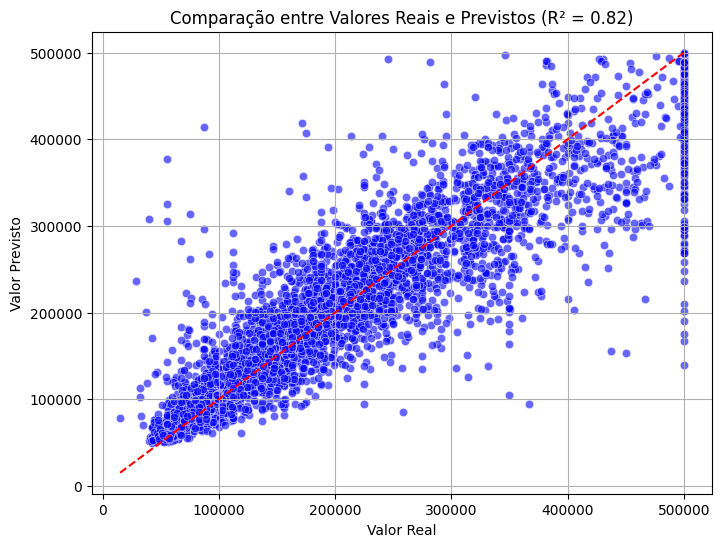

In [352]:
RF.fit(x_casa_treinamento, y_casa_treinamento)
previsoes = RF.predict(x_casa_teste)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

r2 = r2_score(y_casa_teste, previsoes)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_casa_teste, y=previsoes, color='blue', alpha=0.6)
plt.plot([y_casa_teste.min(), y_casa_teste.max()], [y_casa_teste.min(), y_casa_teste.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title(f'Comparação entre Valores Reais e Previstos (R² = {r2:.2f})')
plt.grid(True)
plt.show()

---
# Conclusão:
Finalizamos mais um projeto de Machine Learning, desta vez focado em um problema de regressão, com o objetivo de prever os valores medianos dos preços de casas na Califórnia na década de 1990. O modelo alcançou um desempenho razoável, com um MAE (Erro Absoluto Médio) de aproximadamente 31.852,70.

Apesar do bom desempenho em termos absolutos, é importante ressaltar que, em um cenário real de negócios — como uma empresa que dependa da previsão precisa dos preços das casas —, esse nível de erro pode ser considerado elevado. Em situações comerciais, um R² próximo de 0.95 ou superior seria mais desejável para minimizar riscos e perdas financeiras.

Portanto, embora o modelo desenvolvido seja adequado para fins acadêmicos ou exploratórios, ele ainda carece de aprimoramentos e ajustes para aplicações em ambiente de produção ou decisões críticas de negócios.